# Final Coding Project 
#### Presented by: Karina G, Tan N, Kim H
------

## Start of extracting data from csv file

In [1]:
#### Tan's Code Starts ####


import csv


def readCSV(stringData, csvFile): # Adds all data from csv to stringData and removes column title row
    file = open(csvFile)
    reader = csv.reader(file)
   
    for row in reader:
        stringData.append(row)
       
    stringData.pop(0) # Remove Column titles

def takeYears(stringYear, stringData): # Adds years to stringYear and removes years from stringData
    for i in range(len(stringData)):
        stringYear.append(stringData[i][0]) # Add Years to stringYear
        stringData[i].remove(stringData[i][0]) # Remove Years from stringData
           
def convertData(stringData,dataList): # Add Converted string values to float values to dataList
    for i in range(len(stringData)):
        floatdata = [] # Resets every iteration i to ensure values don't repeat
        for num in range(len(stringData[i])):
            try:
                x = stringData[i][num].replace(',','') # Removes commas from numbers
                y = x.replace('$','') # Removes $ from numbers
                z = y.replace('%','') # Removes % from numbers
                floatdata.append(float(z))
                #.replace functionality found from python documentation
               #https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str
            except ValueError: # Account for ''
                pass
        dataList.append(floatdata)

def convertYear(stringYear, yearList): # Add converted year values to int values in yearList
    for i in range(len(stringYear)):
        yearList.append(int(stringYear[i]))
    
def generateLists(yearList, dataList, csvFile): # Collects data from csvFile and creates a list of its years and data accordingly. Only does everything for Veg and Slaghter
   
    stringYear = []
    stringData = []
   
    readCSV(stringData,csvFile)
    takeYears(stringYear, stringData)
    convertData(stringData, dataList)
    convertYear(stringYear, yearList)


## Fresh Vegetables ##

vegYears = []
vegData = [] # Values per month

generateLists(vegYears,vegData,'Fresh_vegetables_1947-2015.csv')

#print(vegYear) # For Testing
#print(vegData) # For Testing

## Veg End ##



## Slaughter Steers and Heifers ##

slaughterYears = []
slaughterData = [] # Values per month

generateLists(slaughterYears, slaughterData, 'Slaughter_steers_and_heifers_1947-2015.csv')

#print(slaughterYears) # For Testing
#print(slaughterData) # For Testing

## Slaughter End ##



## Wages ##

wageYears = []
wageData = [] # Amount
wagePerc = [] # % Increases

generateLists(wageYears,wageData,'Average_Wage_Index_1973-2017.csv')

for i in range(len(wageData)): # Adds percentage values to wagePerc and removes it from wageData
    wagePerc.append(wageData[i][1]) # Adds to perc list
    wageData[i].remove(wageData[i][1]) # Removes from data

#print(wageYears) # For Testing
#print(wageData) # For Testing
#print(wagePerc) # For Testing

## Wages End ##



## College $$ ##

stringColData = []
stringColYear = []
collegeData = []
collegeYears = []
fourYearData = []
collegePerc = []

readCSV(stringColData,'College_1971-2018.csv')

stringColData.pop(0) # Remove extra Column header

count = 3 # Set to 3 to account for last 3 rows of Notes
# Count variable to count # of rows with just '' as values

for i in range(len(stringColData)): # Count number of rows with just ''
    if stringColData[i][0] is '':
        count += 1

for num in range(count): # Remove rows with just '' at the end
    stringColData.pop()

for i in range(len(stringColData)): # Remove 'Current Dollars' dataset
    del stringColData[i][11:]
   # del functionality found from Python Docs: https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range

takeYears(stringColYear,stringColData)
stringColYear.pop(0) # Remove year 1971 because of lack of % Increase

convertData(stringColData, collegeData)
collegeData.pop(0) # Remove year 1971 because of lack of % Increase

#print(collegeData) # For Testing

for i in range(len(collegeData)): # Collect Four-Year data
    fourYearData.append(collegeData[i][2]) # Public Four-Year because SJSU is one

#print(stringColYear) # For Testing
   
for i in range(len(stringColYear)): # Remove year extension
   # Example: Before year = 71-72
   # After for statement, year = 71
    stringColYear[i] = stringColYear[i][:2]

convertYear(stringColYear,collegeYears)
   
for i in range(len(collegeYears)): # Convert year values to 1900s or 2000s
    if collegeYears[i] < 50:
        collegeYears[i] = 2000 + collegeYears[i]
    else:
        collegeYears[i] = 1900 + collegeYears[i]

for i in range(len(collegeData)): # College Percentages
    collegePerc.append(collegeData[i][3])
    collegeData[i].remove(collegeData[i][3]) # Remove percentages from data

#print(collegeYears) # For Testing
#print(fourYearData) # For Testing
#print(collegePerc) # For Testing

## College $$ End ##



#### Tan's Code End ####

***
### Calculations 

In [2]:
#### Kim's Code ####

#annual average of Veg Years and Slaughter
differenceVeg = wageYears[0] - vegYears[0]
del vegData[:differenceVeg]
## cuts out years we don't need
x = vegYears[differenceVeg:]
y = []
## assigns values for graph
for i in range(len(vegData)):
    veg = (str(sum(vegData[i])/len(vegData[i])))
    y.append(veg)
## gets average of each year of cost of veg
x = list(map(float, x))   
y = list(map(float, y))
## assigns values for graph

differenceSlaughter = wageYears[0] - slaughterYears[0]
del slaughterData[:differenceSlaughter]
## cuts out years we don't need
k = slaughterYears[differenceSlaughter:]
j = []
## assigns values for graph
for i in range(len(slaughterData)):
    slaughter = (str(sum(slaughterData[i])/len(slaughterData[i])))
    j.append(slaughter)
    
## gets average of each year of cost of steers   
k = list(map(float, k))   
j = list(map(float, j))
## assigns values for graph

#percent increase Average Wages and Colleges

differenceWage = wageYears[44] - slaughterYears[68]
for i in range(differenceWage):
    wagePerc.pop()
## cuts years we don't need
newList = []
for i in range(len(wagePerc)):
    newList.append(wagePerc[i]) # Convert Lists in list to float
wageAvgPerc = round( (sum(newList)/len(newList)), 2 )
## averages percentage increase for wages

differenceCollege = collegeYears[44] - slaughterYears[68]
#for i in range(differenceCollege):
 #   collegePerc.pop()
## cuts years we don't need
newList = []
for i in range(len(collegePerc)):
    newList.append(collegePerc[i]) # Convert Lists in list to float
collegeAvgPerc = round( (sum(newList)/len(newList)), 2 )
## averages percentage increase for college costs



### average annual increase wage, veg, steers, college
difference = wageYears[44] - slaughterYears[68]
for i in range(difference):
    wageData.pop()
## cuts out years we don't need
wageNum = ((wageData[40][0] - (wageData[0][0])))
## wage amount of 1973 subtracted by wage of 2015
wageAvg = round( (wageNum/len(wageData)), 2 )
## divides the difference by length of list to get average

l = len(vegData)-1
vegList = []
for i in range(l):
    vegList.append((vegData[i][11]-vegData[i][0]))
## subtracts final value for that year by the first value
vegAvg = round( (sum(vegList)/len(vegData)), 2)
## divides sum of differences of last value and first value by the length of the list

differenceSlaughter = wageYears[0] - slaughterYears[0]
del slaughterData[:differenceSlaughter]
## cuts out years we don't need
l = len(slaughterData)-1
slaughterList = []
for i in range(l):
    slaughterList.append((slaughterData[i][11]-slaughterData[i][0]))
## steer prices in Dec subtracted by steer prices in Jan of each year in list
slaughterAvg = round( (sum(slaughterList)/len(slaughterData)), 2 )
## sum of each years difference in price of steers divided by length of list to get average

differenceCollege = collegeYears[44] - slaughterYears[68]
for i in range(differenceCollege):
    fourYearData.pop()
## cuts out years we don't need
collegeAvg = round( ((fourYearData[-1]-fourYearData[0])/len(fourYearData)), 2 )
## (subtracts final year cost of college by the first year cost of college) divided by length of all college years available

#print(len(x)) # For Testing
#print(len(y)) # For Testing

print('Average Percent Increase for Wages: ' + str(wageAvgPerc))
print('Average Percent Increase for Public Four Year Colleges: ' + str(collegeAvgPerc))
print('Wage increase from first to last year: ' + str(wageAvg))
print('Vegetable increase from first to last year: ' + str(vegAvg))
print('Slaughter of Steers and Heifers Increase from first to last year: ' + str(slaughterAvg))
print('Four Year College Average Increase from first to last year: ' + str(collegeAvg))

Average Percent Increase for Wages: 4.56
Average Percent Increase for Public Four Year Colleges: 3.0
Wage increase from first to last year: 867.63
Vegetable increase from first to last year: -3.0
Slaughter of Steers and Heifers Increase from first to last year: 6.66
Four Year College Average Increase from first to last year: 157.83



### Recording Data into Excel Sheet

In [3]:
#### Tan Code 2 #####

#years = [1999,2000,2001,2002,2003,2004,2005] # For Testing
#temp1 = [5,1,3,2,5,6,7] # For Testing
#temp2 = [1,2,3,4,5,6,7] # For Testing
#temp3 = [9,9,9,9,9,9,9] # For Testing

with open('newFile.csv', mode='w', newline='') as newFile:
    writer = csv.writer(newFile, delimiter = ',', quotechar = '"', quoting=csv.QUOTE_MINIMAL)
    
    #csv.writer info from https://realpython.com/python-csv/#writing-csv-files-with-csv
    
    #writer.writerow(["Years",Vegetable Increases","Slaughter Increase","Wage Increase","College Increase"])
    #for i in range(len(years)):
        #writer.writerow([years[i],temp1[i],temp2[i],temp3[i]])
        
    writer.writerow(['Vegetable Increase from first year to last','Slaughter Increase from first year to last','Wage Increase from first year to last','Average Annual Wage Increase','College Increase from first to last','Average Annual College Increase'])
    writer.writerow([str(vegAvg),str(slaughterAvg),str(wageAvg),str(wageAvgPerc),str(collegeAvg),str(collegeAvgPerc)])

 #### Tan's Code 2 End ####

___

### Start of Linear Trend Calculations

In [4]:
### Karina Code ###

def mLinTrend(x,y):
    
    ##     To get Numerator for slope equation ##
    li = []
    for i in range(len(x)): #multiples each x,y value of list
        Li = x[i] * y[i]
        li.append(Li)
    #print(li) #to test for loop
    
    li = sum(li)  #sums new list together 
    lix = sum(x) #sums original x list together 
    liy = sum(y) #sums origianl y list together
    
    a = (len(x) * li) - (lix * liy) # numerator of slope
    #print(a) #to test numerator value


    ##     To get Denominator  Function  ## 
    den = []
    for i in range(len(x)): # new list for squaring inside x list 
        Den = (x[i])**2
        den.append(Den)
    #print(den) #for testing for loop  

    dena = len(den) * sum(den)
    denb = sum(x) ** 2

    b = dena - denb #create denominator for slope
    
    m = int(a / b) # divides numerator by denominator to get final result of slope
    return m

def yIntercept(x,y):
    ## for numerator of equation for y - intercept ##

    numb = []
    for i in range(len(x)): # new list for squaring inside x list 
        Numb = (x[i])**2
        numb.append(Numb)        

    numa = sum(y) * sum(numb) #first part of numerator

    numc = []
    for i in range(len(x)): #multiples each x,y value of list
        Numc = x[i] * y[i]
        numc.append(Numc)
        
    #print(li) #test for loop

    a = numa - (sum(x) * sum(numc)) # numerator for equation b 

    ## for Denominator of equation for y - intercept ##

    dena = len(x) * sum(numb) #first portion of denominator for equation b

    denb = (sum(x)) ** 2

    b = dena - denb

    yInt = int(a / b) #obtain y-intercept 
    return yInt
    
    #print(yInt) #test y-intercept code    
    
def LinTrend (x,y):
    m = mLinTrend(x,y)
    b = yIntercept(x,y)
    
    y = []
    for i in range(len(x)):
        yint = ((x[i] * m) + b) * -1
        y.append(yint)
    
    ### To Normalize the Data ###
    
    yfinal = []
    
    for i in range(len(x)):
        yf = (y[i] / x[0]) * 100
        yfinal.append(yf)
        
    
    return yfinal

#LinTrend (x,y) # test LinTrend Line

----

### Start of graph manipulation

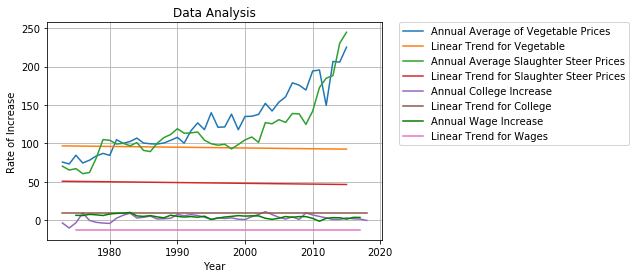

In [7]:
from matplotlib import pyplot as plt
import numpy as np

VegTrend_y = LinTrend (x, y) # Creating Trend Line
SteerTrend_j = LinTrend (k,j) # Creating Trend Line


#print('Length of x: ' + str(len(x))) # For Testing
#print('Length of y: ' + str(len(y))) # For Testing
#print(len(collegeYears)) # For Testing
#print(len(collegePerc)) # For Testing

collegeTrend = LinTrend(collegeYears[1:],collegePerc[1:])
wageTrend = LinTrend(wageYears[2:], wagePerc)



def graph(x, y, k, j, u, r):
   
   # y = Vegetable
   # u = Linear Trend of Veg
   # j = Steer Slaughter
   # r = Slaughter Trend
   
    plt.plot(x, y, label="Annual Average of Vegetable Prices") #creates Legend
    plt.plot(x, u, label="Linear Trend for Vegetable") 
       
    plt.plot(k, j, label="Annual Average Slaughter Steer Prices") 
    plt.plot(k, r, label="Linear Trend for Slaughter Steer Prices") 
   
    plt.plot(collegeYears[1:],collegePerc[1:], label = "Annual College Increase")
    plt.plot(collegeYears[1:], collegeTrend, label="Linear Trend for College") 
   
    plt.plot(wageYears[2:], wagePerc,'g-' ,label = "Annual Wage Increase")
    plt.plot(wageYears[2:], wageTrend, label="Linear Trend for Wages") 
   

    plt.grid(True)

    plt.xlabel("Year") #labels x-axis
    plt.ylabel("Rate of Increase") #labels y-axis
    plt.title("Data Analysis") #labels graph
   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #positions legend
    plt.show() #allows legend to appear

graph(x,y,k,j, VegTrend_y, SteerTrend_j)

### Karina Code End

## POINTS OF IMPROVEMENT 
- MORE TIME 
- FIX Trend line 
- read more into data analysis 
- Better understanding of outputs 
- Making general functions for Calculations
- Understanding data given
- Variable Names

***
### All Code In One Cell

Average Percent Increase for Wages: 4.56
Average Percent Increase for Public Four Year Colleges: 3.0
Wage increase from first to last year: 867.63
Vegetable increase from first to last year: -3.0
Slaughter of Steers and Heifers Increase from first to last year: 6.66
Four Year College Average Increase from first to last year: 157.83


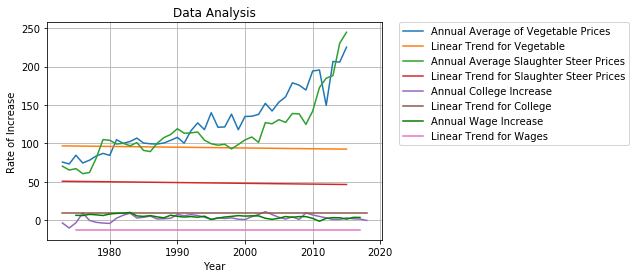

In [9]:
#### Tan's Code Starts ####


import csv


def readCSV(stringData, csvFile): # Adds all data from csv to stringData and removes column title row
    file = open(csvFile)
    reader = csv.reader(file)
   
    for row in reader:
        stringData.append(row)
       
    stringData.pop(0) # Remove Column titles

def takeYears(stringYear, stringData): # Adds years to stringYear and removes years from stringData
    for i in range(len(stringData)):
        stringYear.append(stringData[i][0]) # Add Years to stringYear
        stringData[i].remove(stringData[i][0]) # Remove Years from stringData
           
def convertData(stringData,dataList): # Add Converted string values to float values to dataList
    for i in range(len(stringData)):
        floatdata = [] # Resets every iteration i to ensure values don't repeat
        for num in range(len(stringData[i])):
            try:
                x = stringData[i][num].replace(',','') # Removes commas from numbers
                y = x.replace('$','') # Removes $ from numbers
                z = y.replace('%','') # Removes % from numbers
                floatdata.append(float(z))
                #.replace functionality found from python documentation
               #https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str
            except ValueError: # Account for ''
                pass
        dataList.append(floatdata)

def convertYear(stringYear, yearList): # Add converted year values to int values in yearList
    for i in range(len(stringYear)):
        yearList.append(int(stringYear[i]))
    
def generateLists(yearList, dataList, csvFile): # Collects data from csvFile and creates a list of its years and data accordingly. Only does everything for Veg and Slaghter
   
    stringYear = []
    stringData = []
   
    readCSV(stringData,csvFile)
    takeYears(stringYear, stringData)
    convertData(stringData, dataList)
    convertYear(stringYear, yearList)


## Fresh Vegetables ##

vegYears = []
vegData = [] # Values per month

generateLists(vegYears,vegData,'Fresh_vegetables_1947-2015.csv')

#print(vegYear) # For Testing
#print(vegData) # For Testing

## Veg End ##



## Slaughter Steers and Heifers ##

slaughterYears = []
slaughterData = [] # Values per month

generateLists(slaughterYears, slaughterData, 'Slaughter_steers_and_heifers_1947-2015.csv')

#print(slaughterYears) # For Testing
#print(slaughterData) # For Testing

## Slaughter End ##



## Wages ##

wageYears = []
wageData = [] # Amount
wagePerc = [] # % Increases

generateLists(wageYears,wageData,'Average_Wage_Index_1973-2017.csv')

for i in range(len(wageData)): # Adds percentage values to wagePerc and removes it from wageData
    wagePerc.append(wageData[i][1]) # Adds to perc list
    wageData[i].remove(wageData[i][1]) # Removes from data

#print(wageYears) # For Testing
#print(wageData) # For Testing
#print(wagePerc) # For Testing

## Wages End ##



## College $$ ##

stringColData = []
stringColYear = []
collegeData = []
collegeYears = []
fourYearData = []
collegePerc = []

readCSV(stringColData,'College_1971-2018.csv')

stringColData.pop(0) # Remove extra Column header

count = 3 # Set to 3 to account for last 3 rows of Notes
# Count variable to count # of rows with just '' as values

for i in range(len(stringColData)): # Count number of rows with just ''
    if stringColData[i][0] is '':
        count += 1

for num in range(count): # Remove rows with just '' at the end
    stringColData.pop()

for i in range(len(stringColData)): # Remove 'Current Dollars' dataset
    del stringColData[i][11:]
   # del functionality found from Python Docs: https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range

takeYears(stringColYear,stringColData)
stringColYear.pop(0) # Remove year 1971 because of lack of % Increase

convertData(stringColData, collegeData)
collegeData.pop(0) # Remove year 1971 because of lack of % Increase

#print(collegeData) # For Testing

for i in range(len(collegeData)): # Collect Four-Year data
    fourYearData.append(collegeData[i][2]) # Public Four-Year because SJSU is one

#print(stringColYear) # For Testing
   
for i in range(len(stringColYear)): # Remove year extension
   # Example: Before year = 71-72
   # After for statement, year = 71
    stringColYear[i] = stringColYear[i][:2]

convertYear(stringColYear,collegeYears)
   
for i in range(len(collegeYears)): # Convert year values to 1900s or 2000s
    if collegeYears[i] < 50:
        collegeYears[i] = 2000 + collegeYears[i]
    else:
        collegeYears[i] = 1900 + collegeYears[i]

for i in range(len(collegeData)): # College Percentages
    collegePerc.append(collegeData[i][3])
    collegeData[i].remove(collegeData[i][3]) # Remove percentages from data

#print(collegeYears) # For Testing
#print(fourYearData) # For Testing
#print(collegePerc) # For Testing

## College $$ End ##



#### Tan's Code End ####

#### Kim's Code ####

#annual average of Veg Years and Slaughter
differenceVeg = wageYears[0] - vegYears[0]
del vegData[:differenceVeg]
## cuts out years we don't need
x = vegYears[differenceVeg:]
y = []
## assigns values for graph
for i in range(len(vegData)):
    veg = (str(sum(vegData[i])/len(vegData[i])))
    y.append(veg)
## gets average of each year of cost of veg
x = list(map(float, x))   
y = list(map(float, y))
## assigns values for graph

differenceSlaughter = wageYears[0] - slaughterYears[0]
del slaughterData[:differenceSlaughter]
## cuts out years we don't need
k = slaughterYears[differenceSlaughter:]
j = []
## assigns values for graph
for i in range(len(slaughterData)):
    slaughter = (str(sum(slaughterData[i])/len(slaughterData[i])))
    j.append(slaughter)
    
## gets average of each year of cost of steers   
k = list(map(float, k))   
j = list(map(float, j))
## assigns values for graph

#percent increase Average Wages and Colleges

differenceWage = wageYears[44] - slaughterYears[68]
for i in range(differenceWage):
    wagePerc.pop()
## cuts years we don't need
newList = []
for i in range(len(wagePerc)):
    newList.append(wagePerc[i]) # Convert Lists in list to float
wageAvgPerc = round( (sum(newList)/len(newList)), 2 )
## averages percentage increase for wages

differenceCollege = collegeYears[44] - slaughterYears[68]
#for i in range(differenceCollege):
 #   collegePerc.pop()
## cuts years we don't need
newList = []
for i in range(len(collegePerc)):
    newList.append(collegePerc[i]) # Convert Lists in list to float
collegeAvgPerc = round( (sum(newList)/len(newList)), 2 )
## averages percentage increase for college costs



### average annual increase wage, veg, steers, college
difference = wageYears[44] - slaughterYears[68]
for i in range(difference):
    wageData.pop()
## cuts out years we don't need
wageNum = ((wageData[40][0] - (wageData[0][0])))
## wage amount of 1973 subtracted by wage of 2015
wageAvg = round( (wageNum/len(wageData)), 2 )
## divides the difference by length of list to get average

l = len(vegData)-1
vegList = []
for i in range(l):
    vegList.append((vegData[i][11]-vegData[i][0]))
## subtracts final value for that year by the first value
vegAvg = round( (sum(vegList)/len(vegData)), 2)
## divides sum of differences of last value and first value by the length of the list

differenceSlaughter = wageYears[0] - slaughterYears[0]
del slaughterData[:differenceSlaughter]
## cuts out years we don't need
l = len(slaughterData)-1
slaughterList = []
for i in range(l):
    slaughterList.append((slaughterData[i][11]-slaughterData[i][0]))
## steer prices in Dec subtracted by steer prices in Jan of each year in list
slaughterAvg = round( (sum(slaughterList)/len(slaughterData)), 2 )
## sum of each years difference in price of steers divided by length of list to get average

differenceCollege = collegeYears[44] - slaughterYears[68]
for i in range(differenceCollege):
    fourYearData.pop()
## cuts out years we don't need
collegeAvg = round( ((fourYearData[-1]-fourYearData[0])/len(fourYearData)), 2 )
## (subtracts final year cost of college by the first year cost of college) divided by length of all college years available

#print(len(x)) # For Testing
#print(len(y)) # For Testing

print('Average Percent Increase for Wages: ' + str(wageAvgPerc))
print('Average Percent Increase for Public Four Year Colleges: ' + str(collegeAvgPerc))
print('Wage increase from first to last year: ' + str(wageAvg))
print('Vegetable increase from first to last year: ' + str(vegAvg))
print('Slaughter of Steers and Heifers Increase from first to last year: ' + str(slaughterAvg))
print('Four Year College Average Increase from first to last year: ' + str(collegeAvg))

### Kim's Code End ####

#### Tan Code 2 #####

#years = [1999,2000,2001,2002,2003,2004,2005] # For Testing
#temp1 = [5,1,3,2,5,6,7] # For Testing
#temp2 = [1,2,3,4,5,6,7] # For Testing
#temp3 = [9,9,9,9,9,9,9] # For Testing

with open('newFile.csv', mode='w', newline='') as newFile:
    writer = csv.writer(newFile, delimiter = ',', quotechar = '"', quoting=csv.QUOTE_MINIMAL)
    
    #csv.writer info from https://realpython.com/python-csv/#writing-csv-files-with-csv
    
    #writer.writerow(["Years",Vegetable Increases","Slaughter Increase","Wage Increase","College Increase"])
    #for i in range(len(years)):
        #writer.writerow([years[i],temp1[i],temp2[i],temp3[i]])
        
    writer.writerow(['Vegetable Increase from first year to last','Slaughter Increase from first year to last','Wage Increase from first year to last','Average Annual Wage Increase','College Increase from first to last','Average Annual College Increase'])
    writer.writerow([str(vegAvg),str(slaughterAvg),str(wageAvg),str(wageAvgPerc),str(collegeAvg),str(collegeAvgPerc)])

#### Tan's Code 2 End ####

### Karina Code ###

def mLinTrend(x,y):
    
    ##     To get Numerator for slope equation ##
    li = []
    for i in range(len(x)): #multiples each x,y value of list
        Li = x[i] * y[i]
        li.append(Li)
    #print(li) #to test for loop
    
    li = sum(li)  #sums new list together 
    lix = sum(x) #sums original x list together 
    liy = sum(y) #sums origianl y list together
    
    a = (len(x) * li) - (lix * liy) # numerator of slope
    #print(a) #to test numerator value


    ##     To get Denominator  Function  ## 
    den = []
    for i in range(len(x)): # new list for squaring inside x list 
        Den = (x[i])**2
        den.append(Den)
    #print(den) #for testing for loop  

    dena = len(den) * sum(den)
    denb = sum(x) ** 2

    b = dena - denb #create denominator for slope
    
    m = int(a / b) # divides numerator by denominator to get final result of slope
    return m

def yIntercept(x,y):
    ## for numerator of equation for y - intercept ##

    numb = []
    for i in range(len(x)): # new list for squaring inside x list 
        Numb = (x[i])**2
        numb.append(Numb)        

    numa = sum(y) * sum(numb) #first part of numerator

    numc = []
    for i in range(len(x)): #multiples each x,y value of list
        Numc = x[i] * y[i]
        numc.append(Numc)
        
    #print(li) #test for loop

    a = numa - (sum(x) * sum(numc)) # numerator for equation b 

    ## for Denominator of equation for y - intercept ##

    dena = len(x) * sum(numb) #first portion of denominator for equation b

    denb = (sum(x)) ** 2

    b = dena - denb

    yInt = int(a / b) #obtain y-intercept 
    return yInt
    
    #print(yInt) #test y-intercept code    
    
def LinTrend (x,y):
    m = mLinTrend(x,y)
    b = yIntercept(x,y)
    
    y = []
    for i in range(len(x)):
        yint = ((x[i] * m) + b) * -1
        y.append(yint)
    
    ### To Normalize the Data ###
    
    yfinal = []
    
    for i in range(len(x)):
        yf = (y[i] / x[0]) * 100
        yfinal.append(yf)
        
    
    return yfinal

#LinTrend (x,y) # test LinTrend Line

from matplotlib import pyplot as plt
import numpy as np

VegTrend_y = LinTrend (x, y) # Creating Trend Line
SteerTrend_j = LinTrend (k,j) # Creating Trend Line


#print('Length of x: ' + str(len(x))) # For Testing
#print('Length of y: ' + str(len(y))) # For Testing
#print(len(collegeYears)) # For Testing
#print(len(collegePerc)) # For Testing

collegeTrend = LinTrend(collegeYears[1:],collegePerc[1:])
wageTrend = LinTrend(wageYears[2:], wagePerc)



def graph(x, y, k, j, u, r):
   
   # y = Vegetable
   # u = Linear Trend of Veg
   # j = Steer Slaughter
   # r = Slaughter Trend
   
    plt.plot(x, y, label="Annual Average of Vegetable Prices") #creates Legend
    plt.plot(x, u, label="Linear Trend for Vegetable") 
       
    plt.plot(k, j, label="Annual Average Slaughter Steer Prices") 
    plt.plot(k, r, label="Linear Trend for Slaughter Steer Prices") 
   
    plt.plot(collegeYears[1:],collegePerc[1:], label = "Annual College Increase")
    plt.plot(collegeYears[1:], collegeTrend, label="Linear Trend for College") 
   
    plt.plot(wageYears[2:], wagePerc,'g-' ,label = "Annual Wage Increase")
    plt.plot(wageYears[2:], wageTrend, label="Linear Trend for Wages") 
   

    plt.grid(True)

    plt.xlabel("Year") #labels x-axis
    plt.ylabel("Rate of Increase") #labels y-axis
    plt.title("Data Analysis") #labels graph
   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #positions legend
    plt.show() #allows legend to appear

graph(x,y,k,j, VegTrend_y, SteerTrend_j)

### Karina Code End ###